### 사이킷런으로 타이타닉 생존자 예측

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

titanic_df = pd.read_csv('./train.csv')
titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [2]:
print('\n ### 학습 데이터 정보###')
print(titanic_df.info())


 ### 학습 데이터 정보###
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
None


- 2개의 float64, 5개의 int64, 4개의 object 
- Age, Cabin, Embarked 칼럼이 Null 값을 가지고 있음.


In [3]:
titanic_df['Age'].fillna(titanic_df['Age'].mean(), inplace=True)
titanic_df['Cabin'].fillna('N', inplace=True)
titanic_df['Embarked'].fillna('N', inplace=True)
print('데이터 세트 Null 값 개수', titanic_df.isnull().sum().sum())

데이터 세트 Null 값 개수 0


- 문자열 피처의 Sex, Cabin Embarked 이 피처의 값 분류를 살펴본다.


In [4]:
print("Sex 값 분포 : \n", titanic_df['Sex'].value_counts())
print("\n Cabin 값 분포 : \n", titanic_df['Cabin'].value_counts())
print("\n Embarked 값 분포 : \n", titanic_df['Embarked'].value_counts())

Sex 값 분포 : 
 male      577
female    314
Name: Sex, dtype: int64

 Cabin 값 분포 : 
 N              687
G6               4
B96 B98          4
C23 C25 C27      4
F2               3
D                3
E101             3
F33              3
C22 C26          3
D33              2
D20              2
C68              2
C2               2
C124             2
C126             2
C93              2
C78              2
E24              2
B51 B53 B55      2
E33              2
B58 B60          2
D36              2
C92              2
B49              2
E121             2
B20              2
E8               2
B28              2
C65              2
F G73            2
              ... 
C49              1
D7               1
B73              1
D45              1
D37              1
C86              1
C103             1
C45              1
C106             1
C54              1
C87              1
E31              1
C148             1
F E69            1
C46              1
C128             1
C118             1
B30   

- Sex, Embarked 값은 별문제가 없는데
- Cabin은 값이 여러가지로 분포되어있다.
- 선실등급을 나타내는 첫 번째 알파벳이 중요해보이니까 앞 알파벳만 남긴다.

In [5]:
titanic_df['Cabin'] = titanic_df['Cabin'].str[:1]
print(titanic_df['Cabin'].head(3))

0    N
1    C
2    N
Name: Cabin, dtype: object


- 머신러닝 알고리즘을 적용해서 예측을 하기 전에 데이터를 탐색해보도록한다.
- 사고가 날 경우 여성과 아이들, 그리고 노약자가 제일 먼저 구조 대상이다.
- 그리고 부자나 유명인이 다음 구조 대상이었을 것이다.
- 삼등실에 탄 많은 가난한 이는 생존 못했을 가능성이 높을것 같다.
- 성별에 따른 생존수를 비교해보도록 한다.


In [6]:
titanic_df.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

- seaborn 패키지로 시각화하여 데이터를 분석하도록한다.


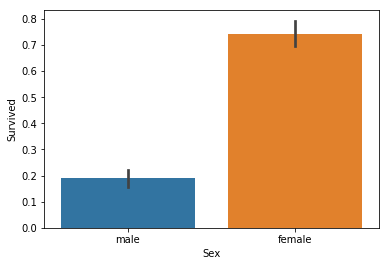

In [7]:
sns.barplot(x='Sex', y='Survived', data=titanic_df)

- 부자와 가난한 사람간의 생존확률을 보도록한다.
- 일등실, 이등실, 삼등실에 따른 생존확률 그리고 성별도 함께 보도록한다.
- 객실등급별 성별에 따른 생존확률을 표현해보도록한다.


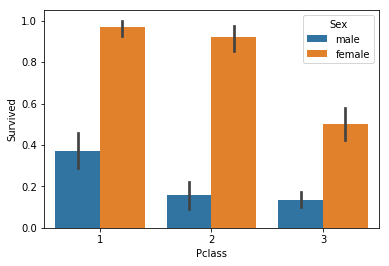

In [8]:
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=titanic_df)

- 여성의 경우 일,이등실에 따른 생존확률은 큰 차이가 없지만 삼등실의 경우 생존확률이 떨어진다.
- 남성의 경우 일등실의 생존확률이 이,삼등실의 생존확률보다 월등히 높다.
- 이번에는 Age에 따른 생존확률을 보도록한다.
- Age는 값 종류가 많기 때문에 범위별로 분류하여 카테고리 값을 할당하도록 한다.


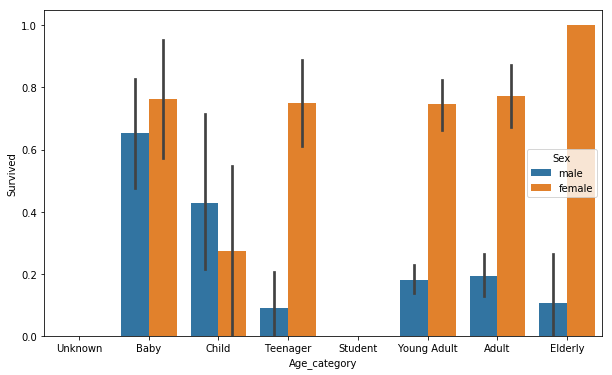

In [9]:
# DataFrame의 apply lambda식에 사용.
def get_category(age):
    cat = ''
    if age <= -1: cat = 'Unknown'
    elif age <= 5: cat = 'Baby'
    elif age <= 12: cat= 'Child'
    elif age <= 18: cat = 'Teenager'
    elif age <= 25: cat = 'Studend'
    elif age <= 35: cat = 'Young Adult'
    elif age <= 60: cat = 'Adult'
    else : cat= 'Elderly'
    
    return cat

# 막대 ㅋ그래프 크기 figure 조정
plt.figure(figsize=(10,6))
# x축 값을 순차적으로 표시하기 위해 따로 리스트에 담아줌
group_names=['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Elderly']

# lambda 식에 get_category() 함수를 반환값으로 지정한다.
titanic_df['Age_category'] = titanic_df['Age'].apply(lambda x : get_category(x))
sns.barplot(x='Age_category', y='Survived', hue='Sex', data=titanic_df, order=group_names)
titanic_df.drop('Age_category', axis=1, inplace=True)

- 여자 Baby의경우 생존확률이 높다.
- 여자 Child의 경우 다른 연령대에 비해 생존률이 낮다.
- 여자 Elderly의 경우 생존율이 매우 높다.



- 문자열 카테고리 피처를 숫자형 카테고리피처로 변환하도록한다.
- 사이킷런의 LabelEncoder를 이용해 레이블 인코딩을 적용한다.


In [10]:
from sklearn import preprocessing

def encode_features(dataDF):
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features:
        le = preprocessing.LabelEncoder()
        le = le.fit(dataDF[feature])
        dataDF[feature] = le.transform(dataDF[feature])
        
    return dataDF

titanic_df = encode_features(titanic_df)
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,7,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,2,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,7,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2,3
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,7,3


- Sex, Cabin, Embarked 속성이 숫자형으로 바뀌었다.
- 지금까지 피처를 가공한 내역을 정리하고 함수로 만들어 쉽게 재사용할 수 있도록 만든다.
- 데이터 전처리를 전체적으로 호출하는 함수는 transform_features()이다. 
- Null처리, 포매팅, 인코딩을 수행하는 내부함수로 구성


In [11]:
# Null 처리 함수
def fillna(df):
    df['Age'].fillna(df['Age'].mean(),inplace=True)
    df['Cabin'].fillna('N', inplace=True)
    df['Embarked'].fillna('N', inplace=True)
    df['Fare'].fillna(0, inplace=True)
    return df

# 불필요한 속성삭제
def drop_features(df):
    df.drop(['PassengerId','Name','Ticket'], axis=1, inplace=True)
    return df

# 레이블 인코딩
def format_features(df):
    from sklearn.preprocessing import LabelEncoder
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

# 앞에서 설정한 데이터 전처리 함수 호출
def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df



In [12]:
# # 원본 데이터를 재로딩하고, 피처 데이터 세트와 레이블 데이터 세트 추출
titanic_df = pd.read_csv('./train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop('Survived', axis=1)

X_titanic_df = transform_features(X_titanic_df)

- 내려받은 학습 데이터 세트를 기반으로 train_test_split() API를 이용해 별도의 테스트 세트를 추출.


In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test = train_test_split(X_titanic_df, y_titanic_df, test_size=0.2, random_state=42)


### 학습
- 결정트리, 랜덤포레스트, 로지스틱 회귀를 이용해 학습
- DecisionTreeClassifier, RandomForestClassifier, LogisticRegression


In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

dt_clf = DecisionTreeClassifier(random_state=42)
rf_clf = RandomForestClassifier(random_state=42)
lr_clf = LogisticRegression()

# 결정트리 학습
dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)
print('DecisionTreeClassifier 정확도 : {:.4f}'.format(accuracy_score(y_test, dt_pred)))

# 랜덤포레스트 학습
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)
print('RandomForestClassifier 정확도 : {:.4f}'.format(accuracy_score(y_test, rf_pred)))

# 로지스틱 회귀  학습
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)
print('LogisticRegression 정확도 : {:.4f}'.format(accuracy_score(y_test, lr_pred)))

DecisionTreeClassifier 정확도 : 0.7709
RandomForestClassifier 정확도 : 0.8045
LogisticRegression 정확도 : 0.7933


/home/jeongmyeong/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/jeongmyeong/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


- 교차 검증으로 결정 트리 모델을 좀 더 평가해보도록 한다.
- model_selection 패키지의 KFold클래스, cross_val_score(), GridSearchCV 클래스를 모두 사용한다.


In [25]:
from sklearn.model_selection import KFold

def exec_kfold(clf, folds=5):
    kfold = KFold(n_splits=folds)
    scores=[]
    
    for iter_count, (train_index, test_index) in enumerate(kfold.split(X_titanic_df)):
        X_train, X_test = X_titanic_df.values[train_index], X_titanic_df.values[test_index]
        y_train, y_test = y_titanic_df.values[train_index], y_titanic_df.values[test_index]
        
        clf.fit(X_train, y_train)
        predictions = clf.predict(X_test)
        accuracy = accuracy_score(y_test, predictions)
        scores.append(accuracy)
        print("교차 검증 {} 정확도 : {:.4f}".format(iter_count, accuracy))
        
        mean_score = np.mean(scores)
        print("평균 정확도 : {:.4f}".format(mean_score))
        
exec_kfold(dt_clf, folds=5)

교차 검증 0 정확도 : 0.7318
평균 정확도 : 0.7318
교차 검증 1 정확도 : 0.7640
평균 정확도 : 0.7479
교차 검증 2 정확도 : 0.8090
평균 정확도 : 0.7683
교차 검증 3 정확도 : 0.7753
평균 정확도 : 0.7700
교차 검증 4 정확도 : 0.8315
평균 정확도 : 0.7823


- 평균 정확도는 약 78.23 %
- 다음은 cross_val_score() API를 이용해 구해본다


In [26]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(dt_clf, X_titanic_df, y_titanic_df, cv=5)
for iter_count, accuracy in enumerate(scores):
    print("교차검증 {} 정확도 : {:.4f}".format(iter_count, accuracy))
    
print("평균 정확도 : {:.4f}".format(np.mean(scores)))

교차검증 0 정확도 : 0.7654
교차검증 1 정확도 : 0.7821
교차검증 2 정확도 : 0.7921
교차검증 3 정확도 : 0.7865
교차검증 4 정확도 : 0.8249
평균 정확도 : 0.7902


- 평균정확도는 79.02% 이다.
- KFold 와 정확도가 다른데 이는 cross_val_score()는 StratifiedKFold를 이용하여 폴드세트를 분할하기 때문
- GridSearchCV를 이용하여 DecisionTreeClassifier의 최적 하이퍼 파라미터를 찾아보도록 한다.


In [29]:
from sklearn.model_selection import GridSearchCV

parameters = {'max_depth':[2,3,5,10],
             'min_samples_split':[2,3,5],
             'min_samples_leaf':[1,5,8]}

grid_dclf = GridSearchCV(dt_clf, param_grid=parameters, scoring='accuracy', cv=5)
grid_dclf.fit(X_train, y_train)

print('GridSearchCV 최적 하이퍼 파라미터 : ', grid_dclf.best_params_)
print('GridSearchCV 최고 정확도 : {:.4f}'.format(grid_dclf.best_score_))
best_dclf = grid_dclf.best_estimator_

dpredctions = best_dclf.predict(X_test)
accuracy = accuracy_score(y_test, dpredctions)
print("테스트 세트에서의 DecisionTreeClassifier 정확도 : {:.4f}".format(accuracy))



GridSearchCV 최적 하이퍼 파라미터 :  {'max_depth': 10, 'min_samples_leaf': 8, 'min_samples_split': 2}
GridSearchCV 최고 정확도 : 0.8202
테스트 세트에서의 DecisionTreeClassifier 정확도 : 0.8212


### 정리

- 데이터의 가공 및 변환(전처리 작업) >>> 학습데이터와 테스트 데이터로 분리 >>> 학습데이터를 기반으로 머신러닝 알고리즘을 적용해 모델을 학습 >>> 학습된 모델을 기반으로 테스트 데이터에 대한 예측 수행 >>> 예측된 결괏값을 실제 결괏값과 비교해 모델에 대한 평가 수행 


### 전처리
- 오류데이터의 보정
- 결측값 처리
- 인코딩 작업 : 레이블 인코딩, 원핫인코딩
- 데이터 스케일링/정규화
- 머신러닝 알고리즘이 최적으로 수행될 수 있게 데이터를 사전 처리

### 평가
- 학습 데이터 세트로 학습한 뒤 반드시 별도의 테스트 데이터 세트로 평가 되어야함.
- 테스트 데이터의 건수 부족이나 고정된 테스트 데이터 세트를 이용한 반복적인 모델 학습과 평가는 좋지않은 머신러닝 모델을 만들 가능성이 높음.
